<div
  style="
    padding: 36px 20px 63px 20px;
    background-color: #009ee4;
    border-radius: 0 0 200px 0;
  "
>
  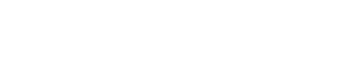

  <div
    style="
      color: white;
      margin-top: 52px;
      font-size: 56px;
      line-height: 64px;
      font-family: Arial;
    "
  >
Bootstrap своими руками
     
  </div>
</div>


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [6]:
#датасет
data = pd.read_csv('bakery_ab_test.csv', index_col = 0)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150483 entries, 1 to 152999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   user_id                      150483 non-null  int64  
 1   test_group                   150483 non-null  object 
 2   order_sum                    47425 non-null   float64
 3   geo_group                    150483 non-null  object 
 4   marketing_group              150483 non-null  object 
 5   created_order_within_window  150483 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 8.0+ MB


Используем Bootstrap. Он уже реализован в библиотеке `bootstrapped` — скачаем ее:

In [ ]:
# скачиваем библиотеку с помощью !pip
!pip install bootstrapped

In [8]:
# импортируем необходимые модули
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

Нам понадобится функция `bootstrap_ab`. Чтобы подготовить данные, давайте посмотрим, какие аргументы она принимает:

Первый аргумент — `test` — массив с данными тестовой группы.

Второй аргумент — `ctrl` — массив с данными контрольной группы.

- отделим только пользователей из тестовой и после контрольной группы
- удалим пустые значения, то есть пользователей, не сделавших покупку
- `.values` превратит серию в массив

In [14]:
test = data[data['test_group'] == 'test']['order_sum'].dropna().values

In [15]:
ctrl = data[data['test_group'] == 'control']['order_sum'].dropna().values

Также нам понадобятся аргументы:


- `stat_func = bs_stats.mean` — что мы хотим исследовать. В нашем случае — среднее значение

- `compare_func = bs_compare.difference` — как мы хотим исследовать. В нашем случае — хотим взять разницу между группами

- `return_distribution = True` — вернем набор разниц, который функция получает в результате всех итераций

Чтобы сохранить то, что возвращает функция, запишем результат ее работы в переменную `boot_results`

In [16]:
boot_results = bs.bootstrap_ab(test = test, ctrl = ctrl
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)

Мы получили массив разниц в средних чеках между нашими группами.

In [17]:
boot_results

array([186.12125545, 160.49984322, 200.14916007, ..., 233.44093392,
       209.34416033, 241.81561661])

### Доверительный интервал

Значение среднего чека, которое мы получили для обеих групп, верно только для тех групп пользователей, которые пришли в течение эксперимента. Если бы в эксперименте участвовали похожие, но другие пользователи — значение среднего чека немного, но отличалось бы. Понять, насколько могут отличаться похожие группы в нашем эксперименте, поможет доверительный интервал.

Уровень доверия обычно устанавливают в 95%. То есть можно сказать, что в 95% аналогичных экспериментов конверсия будет колебаться внутри этого интервала. 



**Зададим границы доверительного интервала от 2,5 до 97,5 — между ними как раз 95%.**


Используем полученный выше массив в переменной `boot_results`, чтобы выяснить доверительный интервал — то есть тот интервал колебаний среднего чека похожих экспериментов.

In [18]:
borders = np.percentile(boot_results, [2.5, 97.5]) # считаем перцентили
borders

array([128.44426973, 291.1145218 ])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


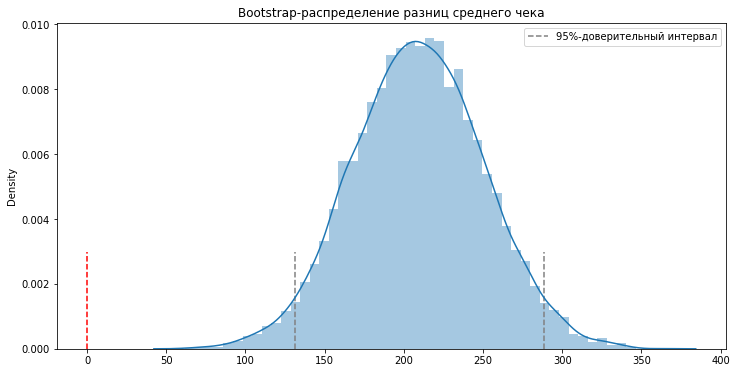

In [43]:
sns.distplot(boot_results) # функция построения распределения
plt.title('Bootstrap-распределение разниц среднего чека')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders, # отрисуем перцентили
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()


      - реализовать bootstrap без использования специальных библиотек (можно использовать pandas)
     
      - проверить статзначимость различий в среднем чеке теста
      
      - сравнить результат работы собственного кода с тем, что написан с помощью библиотеки bootstrapped  

1. Вспоминаем алгоритм `bootstrap`.
2. Продумываем алгоритм кода.
3. Cравниваем  выводы с результатами, полученными с помощью функции из библиотеки `bootstrapped`.

In [34]:
def bootstrap_man (test, ctrl):
    newstrap = []
    for i in range(10000):
        test_sample = np.random.choice(test, size = len(test), replace = True)
        ctrl_sample = np.random.choice(ctrl, size = len(ctrl), replace = True)
        test_mean = test_sample.mean()
        ctrl_mean = ctrl_sample.mean()
        newstrap.append(test_mean-ctrl_mean)
    return newstrap

In [38]:
newstrap = bootstrap_man (test, ctrl)

In [39]:
borders = np.percentile(newstrap, [2.5, 97.5]) # считаем перцентили
borders

array([131.10179366, 288.5963638 ])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


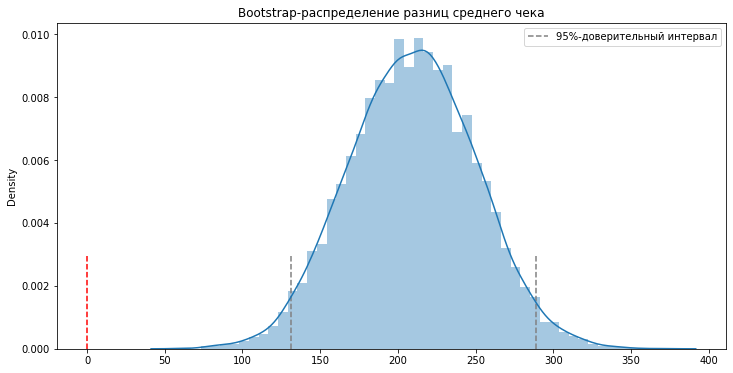

In [40]:
sns.distplot(newstrap) # функция построения распределения
plt.title('Bootstrap-распределение разниц среднего чека')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders, # отрисуем перцентили
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

## Используйте готовый код, чтобы сравнить результаты 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


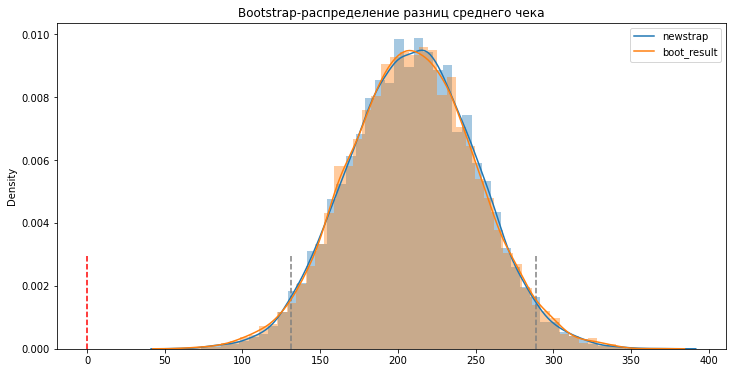

In [42]:
sns.distplot(newstrap) # функция построения распределения
sns.distplot(boot_results)
plt.title('Bootstrap-распределение разниц среднего чека')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders, # отрисуем перцентили
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend(labels = ['newstrap', 'boot_result'])
plt.show()